In [38]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBoxesOnImage as bb_on_image
from imgaug.augmentables.bbs import BoundingBox
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import os

In [24]:
class_dir = 'test_aug/'
image_paths = []
label_paths = []
for file in os.listdir(class_dir):
    if os.path.isdir(class_dir + file):  # falls img/label files in unter ordnern

        label_paths += [class_dir + file + '/' + label for label in os.listdir(
            class_dir + file) if label.split('.')[-1] == 'txt']

        image_paths += [class_dir + file + '/' + label for label in os.listdir(
            class_dir + file) if label.split('.')[-1] == 'jpg']

    elif file.split('.')[-1] == 'jpg':  # falls img/label files in einem ordner
        image_paths.append(class_dir + file)

    elif file.split('.')[-1] == 'txt':
        label_paths.append(class_dir + file)

In [25]:
def get_index_by_name(label_path):
    label_name = '/' + label_path.split('/')[-1][:-3]
    for idx, img_path in enumerate(image_paths):
        if label_name in img_path:
             return idx

In [26]:
# image_paths in gleiche Reihenfolge wie label_paths bringen
image_paths = [image_paths[idx] for idx in list(map(get_index_by_name, label_paths))]

In [27]:
label_paths

['test_aug/0c52f515b83c8686.txt',
 'test_aug/0a4244f8a9185bad.txt',
 'test_aug/0c08678f158fc71c.txt',
 'test_aug/0ad7632a3a459549.txt']

In [28]:
image_paths

['test_aug/0c52f515b83c8686.jpg',
 'test_aug/0a4244f8a9185bad.jpg',
 'test_aug/0c08678f158fc71c.jpg',
 'test_aug/0ad7632a3a459549.jpg']

In [29]:
def get_bbox_from_file(label_file):
    labels = [f.strip() for f in open(label_file).readlines()]    
    my_bbs = []
    for label in labels:
        label_content = label.split(' ')
        label_class = label_content[0]
        label_box = np.array(label_content[1:]).astype(np.float64)
        bbox = ia.BoundingBox(x1=label_box[0], y1=label_box[1], x2=label_box[2], y2=label_box[3], label=label_class)
        my_bbs.append(bbox)
    return my_bbs

In [73]:
images = [cv2.imread(image) for image in image_paths]

In [74]:
labels = [get_bbox_from_file(label) for label in label_paths]

([BoundingBox(x1=106.9558, y1=0.2561, x2=771.5707, y2=606.5948, label=Goat)],
 (683, 1024, 3))

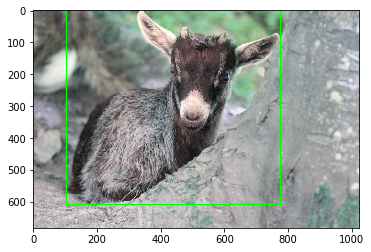

In [75]:
i = 0

img_with_box = bb_on_image(labels[i], shape=images[i].shape).draw_on_image(images[i], size=5)
plt.imshow(img_with_box)
labels[i], images[i].shape

In [76]:


seq = iaa.Sequential([
    iaa.Affine(translate_percent=0.5)
])

In [77]:
images_aug, labels_aug = seq(images=images, bounding_boxes=labels)

In [78]:
for i in range(len(labels_aug)): 
    print('shape' + str(images_aug[i].shape))
    bunding_box_on_image = bb_on_image(labels_aug[i], shape=images_aug[i].shape)
    print('vorher')
    print(labels_aug[i])
    labels_aug[i] = bunding_box_on_image.remove_out_of_image().clip_out_of_image().bounding_boxes
    print('nachher')
    print(labels_aug[i])
    print('')
    # img_aug_with_box = bunding_box_on_image.draw_on_image(images_aug[i], size=5)
    # plt.imshow(img_aug_with_box)
    # labels_aug[i], images_aug[i].shape # bbox ist ausserhalb, also x2 > img.width

shape(683, 1024, 3)
vorher
[BoundingBox(x1=618.9558, y1=342.2561, x2=1283.5707, y2=948.5948, label=Goat)]
nachher
[BoundingBox(x1=618.9558, y1=342.2561, x2=1024.0000, y2=683.0000, label=Goat)]

shape(683, 1024, 3)
vorher
[BoundingBox(x1=915.8400, y1=506.0224, x2=1155.8400, y2=884.6838, label=Mobile_phone)]
nachher
[BoundingBox(x1=915.8400, y1=506.0224, x2=1024.0000, y2=683.0000, label=Mobile_phone)]

shape(768, 1024, 3)
vorher
[BoundingBox(x1=521.3276, y1=561.1369, x2=1345.1274, y2=1015.7529, label=Otter), BoundingBox(x1=757.7559, y1=684.0638, x2=1188.5588, y2=1057.8785, label=Otter)]
nachher
[BoundingBox(x1=521.3276, y1=561.1369, x2=1024.0000, y2=768.0000, label=Otter), BoundingBox(x1=757.7559, y1=684.0638, x2=1024.0000, y2=768.0000, label=Otter)]

shape(763, 1024, 3)
vorher
[BoundingBox(x1=606.2612, y1=660.0586, x2=1140.7258, y2=1057.1512, label=Sparrow), BoundingBox(x1=606.2612, y1=660.0586, x2=1140.7258, y2=1057.1512, label=Sparrow)]
nachher
[BoundingBox(x1=606.2612, y1=660.0586, x

In [79]:
labels_aug

[[BoundingBox(x1=618.9558, y1=342.2561, x2=1024.0000, y2=683.0000, label=Goat)],
 [BoundingBox(x1=915.8400, y1=506.0224, x2=1024.0000, y2=683.0000, label=Mobile_phone)],
 [BoundingBox(x1=521.3276, y1=561.1369, x2=1024.0000, y2=768.0000, label=Otter),
  BoundingBox(x1=757.7559, y1=684.0638, x2=1024.0000, y2=768.0000, label=Otter)],
 [BoundingBox(x1=606.2612, y1=660.0586, x2=1024.0000, y2=763.0000, label=Sparrow),
  BoundingBox(x1=606.2612, y1=660.0586, x2=1024.0000, y2=763.0000, label=Sparrow)]]

In [62]:
labels_aug[i]

[BoundingBox(x1=618.9558, y1=342.2561, x2=1283.5707, y2=948.5948, label=Goat)]

In [63]:
bunding_box_on_image.remove_out_of_image().clip_out_of_image().bounding_boxes

[BoundingBox(x1=618.9558, y1=342.2561, x2=1024.0000, y2=683.0000, label=Goat)]

In [54]:
labels_aug = labels_aug[0].remove_out_of_image().clip_out_of_image().b

AttributeError: 'list' object has no attribute 'remove_out_of_image'

In [ ]:
def write_bbox_to_file(bboxes, path):
    labels = []
    for bbox in bboxes:
        label = ' '.join((str(bbox.label),
                      str(bbox.x1),
                      str(bbox.y1),
                      str(bbox.x2),
                      str(bbox.y2)))
        labels.append(label)
    with open(path, 'w') as f_label:
        for label in labels:
            f_label.write(label + '\n')

In [89]:
for i in range(len(image_paths)):
    write_bbox_to_file(labels_aug[i], label_paths[i][:-4] + '_augmented' + label_paths[i][-4:])
    cv2.imwrite(image_paths[i][:-4] + '_augmented' + image_paths[i][-4:], images_aug[i])